<a href="https://colab.research.google.com/github/nazalan/OnalloLaboratorium/blob/main/forecast/ExchangeRateTimeSeriesEurHuf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Euro to HUF Conversion - Time Series Analysis

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vph7cth/v834fj2k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vph7cth/jy8ts1t5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42935', 'data', 'file=/tmp/tmp1vph7cth/v834fj2k.json', 'init=/tmp/tmp1vph7cth/jy8ts1t5.json', 'output', 'file=/tmp/tmp1vph7cth/prophet_model_y61vfiu/prophet_model-20240304171716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:17:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:17:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


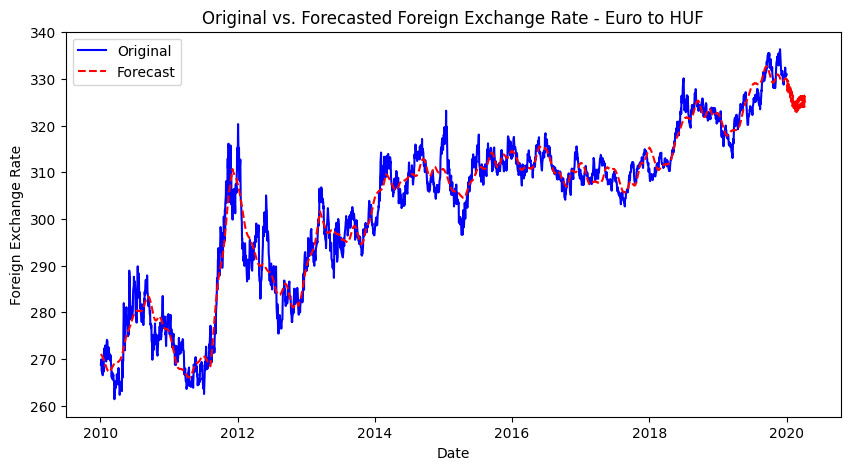

Mean Absolute Error (MAE): 24.883324404129024
Mean Squared Error (MSE): 1017.041860902683
Root Mean Squared Error (RMSE): 31.891093755195712
Forecast results saved to forecast_results.csv


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import warnings

warnings.filterwarnings('ignore')

# Adatok beolvasása és előkészítése
file_path = '/content/sample_data/EUR_HUF Historical Data 05-24.csv'

# Beolvasás a kezdő és vég dátumok alapján
start_date = '2010-01-03' # Default 2005-01-03
end_date = '2020-01-01' # Default 2024-01-01
df = pd.read_csv(file_path, parse_dates=['Date'])
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].reset_index(drop=True)

# Dátumformátum átalakítása és időindex létrehozása
df.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Prophet modell létrehozása és illesztése
model = Prophet(changepoint_prior_scale=0.5)
model.fit(df)

# Jövőbeli időpontok előrejelzése
forecast_days = 100 # Default 365
future = model.make_future_dataframe(periods=forecast_days, freq='D')
forecast = model.predict(future)

# Eredeti és előrejelzett értékek diagramon
plt.figure(figsize=(10, 5))
plt.plot(df['ds'], df['y'], label='Original', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red', linestyle='dashed')
plt.title('Original vs. Forecasted Foreign Exchange Rate - Euro to HUF')
plt.xlabel('Date')
plt.ylabel('Foreign Exchange Rate')
plt.legend()
plt.show()

# Hiba metrikák kiszámítása
y_true = df['y'].append(forecast[forecast['ds'].isin(df['ds']) == False]['yhat'])
y_pred = forecast['yhat']
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Eredeti adatok hozzáadása a forecast DataFrame-hez
forecast_with_actuals = pd.merge(forecast[['ds', 'yhat']], df[['ds', 'y']], on='ds', how='left')
forecast_with_actuals.rename(columns={'y': 'Actual'}, inplace=True)

# Táblázat készítése és CSV fájlba mentése
evaluation_results = forecast_with_actuals[['ds', 'Actual', 'yhat']].rename(columns={'yhat': 'Forecast'})
evaluation_results.to_csv('forecast_results.csv', index=False)